In [1]:
import numpy as np
import pandas as pd

In [2]:
df_1 = pd.read_csv('tweets_train.txt' ,delimiter='\t')
df_2 = pd.read_csv('tweets_test.txt' ,delimiter='\t')
df = pd.concat([df_1,df_2])
df

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake
...,...,...,...,...,...,...,...
3750,578433150071775232,Un présentateur de la ZDF confesse avoir truqu...,257551211,varoufakis_1,Cdt_Sylvestre,Thu Mar 19 05:49:44 +0000 2015,fake
3751,578433646597656576,"Oh les kleine menteurs ""@CorineBarella: Un pré...",27575883,varoufakis_1,damomarc,Thu Mar 19 05:51:42 +0000 2015,fake
3752,578486910491996160,Este es el programa de ZDF en el que confirman...,2049211,varoufakis_1,javierpascual,Thu Mar 19 09:23:21 +0000 2015,fake
3753,578505023912591360,11.34 - wir haben FAST Mittag ▶ Riesen Verwirr...,262222386,varoufakis_1,aotto1968_2,Thu Mar 19 10:35:20 +0000 2015,fake


In [3]:
df[(df['label']=='humor') & (df['imageId(s)'].str.contains('fake'))]

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
2459,264485305908883456,"Christie Blocks Sandy with Body, Saves Town\nh...",781519416,sandyB_fake_12,RossRantsDotCom,Fri Nov 02 21:53:07 +0000 2012,humor
2493,264454012848447489,Britain's last hurricane was devastating... ht...,427742411,sandyB_fake_03,mialily_tudgee,Fri Nov 02 19:48:44 +0000 2012,humor
2494,264694242096599040,"wow, so funny, im on the floor, wow, u r cool ...",507779619,sandyB_fake_03,c0nditions,Sat Nov 03 11:43:19 +0000 2012,humor
2495,264694652773482497,"wow, so funny, im on the floor, wow, u r cool ...",191200490,sandyB_fake_03,taylorbonnd12,Sat Nov 03 11:44:57 +0000 2012,humor
2496,264329415276756993,Britain's last Hurricane was pretty devastatin...,175860415,sandyB_fake_03,kirstyhoylexo,Fri Nov 02 11:33:38 +0000 2012,humor
...,...,...,...,...,...,...,...
14249,443653548698386432,@ZakiEzarik: MH370 found ..LOL http://t.co/MS9...,183570877,malaysia_fake_24,xaex_,Wed Mar 12 07:43:43 +0000 2014,humor
14250,443597162253807616,MH370 found ..LOL http://t.co/9rsOdub8oF,377976842,malaysia_fake_24,ZakiEzarik,Wed Mar 12 03:59:39 +0000 2014,humor
14251,444123242442129408,They found flight MH370!!!!! Lol http://t.co/R...,1593889836,malaysia_fake_24,ibrahimbathich,Thu Mar 13 14:50:07 +0000 2014,humor
14252,443320727572205569,Tak lawak pukimak cibai . \n\n“@SYAFIQBAKHARI:...,1101252169,malaysia_fake_24,xxxerul,Tue Mar 11 09:41:12 +0000 2014,humor


In [4]:
df['label'] = df['label'].replace('humor', 'fake')

<Axes: >

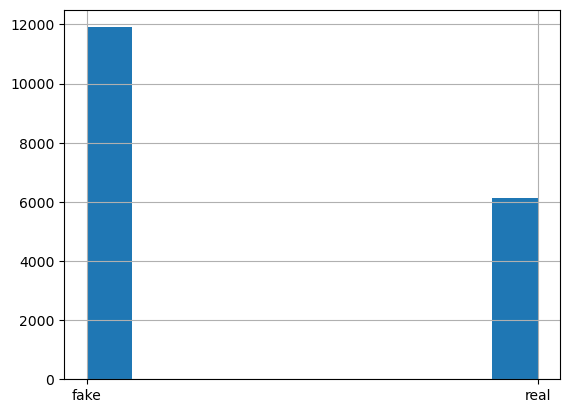

In [102]:
df['label'].hist()

Remove Spanish Text

In [5]:
df = df[df['tweetText'].str.strip() != '']

In [104]:
df.shape

(18032, 7)

In [6]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
def safe_detect(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Detect language
df['language'] = df['tweetText'].apply(safe_detect)

In [7]:
df_en = df[df['language'] == 'en']

<Axes: >

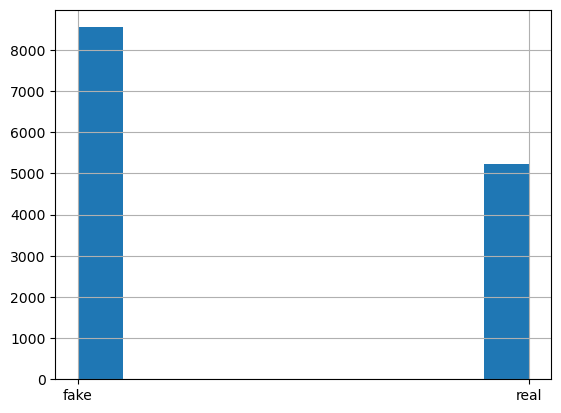

In [8]:
df_en['label'].hist()

In [9]:
df_en['label'] = df_en['label'].map({'fake': 0, 'real': 1})

C:\Users\sheth\AppData\Local\Temp\ipykernel_32144\1709351727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['label'] = df_en['label'].map({'fake': 0, 'real': 1})


In [10]:
df_en

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,language
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,0,en
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,0,en
5,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,0,en
6,262927032705490944,Just in time for #halloween a photo of #hurric...,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,0,en
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out ...,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,0,en
...,...,...,...,...,...,...,...,...
3693,533376728874229760,SYRIA! SYRIAN HERO BOY rescue girl in shootout...,524412614,syrianboy_1,429_saud,Fri Nov 14 21:51:36 +0000 2014,0,en
3695,578314319974240256,Böhmermann in ZDF neo Varoufakis and the fake ...,227769245,varoufakis_1,Coachingtalk,Wed Mar 18 21:57:33 +0000 2015,0,en
3743,578597197782061056,Top story: Jan Böhmermanns Varoufakis-Film ist...,1600725278,varoufakis_1,AutomobileGabri,Thu Mar 19 16:41:36 +0000 2015,0,en
3748,578297874896805891,ZDF Neo lays into #jauch about the Varoufakis ...,17442320,varoufakis_1,jonworth,Wed Mar 18 20:52:12 +0000 2015,0,en


Feature Engineering

In [110]:
import stanza
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from transformers import AutoTokenizer, AutoModel
import numpy as np
import pandas as pd
import torch

stanza_pipeline = stanza.Pipeline(lang='en', processors='tokenize,pos,ner')

2024-12-01 15:42:42 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-12-01 15:42:42 INFO: Downloaded file to C:\Users\sheth\stanza_resources\resources.json
2024-12-01 15:42:42 WARNING: Language en package default expects mwt, which has been added
2024-12-01 15:42:42 INFO: Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| pos       | combined_charlm           |
| ner       | ontonotes-ww-multi_charlm |

2024-12-01 15:42:42 INFO: Using device: cpu
2024-12-01 15:42:42 INFO: Loading: tokenize
c:\Users\sheth\anaconda3\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrus

In [11]:
dataset = df_en.copy()
dataset['tweetText'] = dataset['tweetText'].fillna("")
tweet_texts = dataset['tweetText'].tolist()

In [112]:
def extract_pos_ner_features_stanza(texts, max_features_pos=100, max_features_ner=50):
    pos_tags = []
    ner_labels = []
    for text in texts:
        doc = stanza_pipeline(text)
        pos_tags.append(" ".join([word.upos for sent in doc.sentences for word in sent.words]))
        ner_labels.append(" ".join([ent.type for ent in doc.ents]))
    vectorizer_pos = CountVectorizer(max_features=max_features_pos)
    vectorizer_ner = CountVectorizer(max_features=max_features_ner)
    pos_vector = vectorizer_pos.fit_transform(pos_tags).toarray()
    ner_vector = vectorizer_ner.fit_transform(ner_labels).toarray()
    return pos_vector, ner_vector

In [113]:
pos_vector, ner_vector = extract_pos_ner_features_stanza(tweet_texts)

In [114]:
def generate_additional_features(dataset):
    # Text length
    text_length = dataset['tweetText'].apply(len).values.reshape(-1, 1)
    
    # Count of hashtags and mentions
    hashtag_count = dataset['tweetText'].apply(lambda x: x.count('#')).values.reshape(-1, 1)
    mention_count = dataset['tweetText'].apply(lambda x: x.count('@')).values.reshape(-1, 1)
    
    # Extract hour from timestamp
    hours = pd.to_datetime(dataset['timestamp'], errors='coerce').dt.hour.fillna(0).values.reshape(-1, 1)
    
    # Standardize features
    features = np.hstack((text_length, hashtag_count, mention_count, hours))
    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    return features

In [115]:
additional_features = generate_additional_features(dataset)

C:\Users\sheth\AppData\Local\Temp\ipykernel_30144\3003640683.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hours = pd.to_datetime(dataset['timestamp'], errors='coerce').dt.hour.fillna(0).values.reshape(-1, 1)


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

def generate_topic_embeddings(texts, model_name="bert-base-uncased"):
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    embeddings = []

    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

        with torch.no_grad():
            outputs = model(**inputs)

        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()

        embeddings.append(cls_embedding)
    embeddings = np.array(embeddings)
    return embeddings

In [117]:
topic_embeddings = generate_topic_embeddings(tweet_texts)

In [118]:
final_features = np.hstack((pos_vector, ner_vector, additional_features, topic_embeddings))
np.save('final_features.npy', final_features)
                           

CNN + BILSTM Deep Network

In [119]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
labels = dataset['label'].to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    final_features, labels, test_size=0.2, random_state=5624, stratify=labels
)

In [121]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [122]:
input_dim = X_train.shape[1]
cnn_filters = 128
lstm_hidden_dim = 256
attention_dim = 128
output_dim = 2

In [123]:
conv_layer = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1)  # Reduce filters
relu = nn.ReLU()
pool = nn.MaxPool1d(kernel_size=2)

lstm_layer = nn.LSTM(64, 128, batch_first=True, bidirectional=True)  # Reduce hidden dimensions

attention_fc = nn.Linear(128 * 2, 64)  # Adjust dimensions
attention_weights_fc = nn.Linear(64, 1)
softmax = nn.Softmax(dim=1)

fc_layer = nn.Sequential(
    nn.Dropout(0.6),  # Increased dropout rate
    nn.Linear(128 * 2, 2)
)

In [124]:
def forward(x):
    x = x.unsqueeze(1)  # Add channel dimension for Conv1d
    x = conv_layer(x)
    x = relu(x)
    x = pool(x).permute(0, 2, 1)  # Prepare for LSTM input
    lstm_out, _ = lstm_layer(x)  # Bi-LSTM output
    attention_scores = attention_fc(lstm_out)
    attention_weights = softmax(attention_weights_fc(attention_scores).squeeze(-1))
    attention_weights = attention_weights.unsqueeze(-1)  # Align dimensions
    context_vector = torch.sum(attention_weights * lstm_out, dim=1)
    output = fc_layer(context_vector)
    return output

In [125]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    list(conv_layer.parameters()) +
    list(lstm_layer.parameters()) +
    list(attention_fc.parameters()) +
    list(attention_weights_fc.parameters()) +
    list(fc_layer.parameters()),
    lr=1e-3, weight_decay=1e-4
)

In [126]:
best_loss = float("inf")
patience = 3
wait = 0

In [127]:
epochs = 15
batch_size = 16
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    conv_layer.train()
    lstm_layer.train()
    fc_layer.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        predictions = forward(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    epoch_loss /= len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")
    
    # Early stopping logic
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break

Epoch 1/15, Loss: 0.6696
Epoch 2/15, Loss: 0.6665
Epoch 3/15, Loss: 0.6658
Epoch 4/15, Loss: 0.6665
Epoch 5/15, Loss: 0.6651
Epoch 6/15, Loss: 0.6648
Epoch 7/15, Loss: 0.6631
Epoch 8/15, Loss: 0.6592
Epoch 9/15, Loss: 0.6514
Epoch 10/15, Loss: 0.6387
Epoch 11/15, Loss: 0.6291
Epoch 12/15, Loss: 0.6200
Epoch 13/15, Loss: 0.5992
Epoch 14/15, Loss: 0.5939
Epoch 15/15, Loss: 0.5837


In [128]:
conv_layer.eval()
lstm_layer.eval()
fc_layer.eval()
with torch.no_grad():
    y_pred_probs = forward(X_test_tensor)
    y_pred = y_pred_probs.argmax(dim=1).numpy()


Classification Metrics:
Accuracy: 0.6957
Precision: 0.9265
Recall: 0.2172
F1-Score: 0.3519


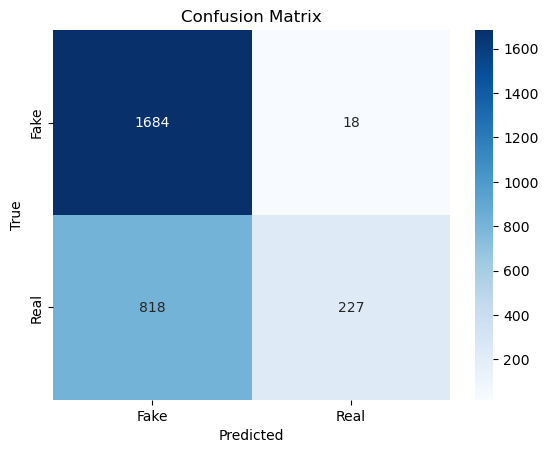

In [129]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Autoencoder one class classification

In [14]:
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split

In [19]:
features = np.load("final_features.npy")[:-1]

In [18]:
dataset

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,language
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,0,en
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,0,en
5,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,0,en
6,262927032705490944,Just in time for #halloween a photo of #hurric...,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,0,en
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out ...,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,0,en
...,...,...,...,...,...,...,...,...
3693,533376728874229760,SYRIA! SYRIAN HERO BOY rescue girl in shootout...,524412614,syrianboy_1,429_saud,Fri Nov 14 21:51:36 +0000 2014,0,en
3695,578314319974240256,Böhmermann in ZDF neo Varoufakis and the fake ...,227769245,varoufakis_1,Coachingtalk,Wed Mar 18 21:57:33 +0000 2015,0,en
3743,578597197782061056,Top story: Jan Böhmermanns Varoufakis-Film ist...,1600725278,varoufakis_1,AutomobileGabri,Thu Mar 19 16:41:36 +0000 2015,0,en
3748,578297874896805891,ZDF Neo lays into #jauch about the Varoufakis ...,17442320,varoufakis_1,jonworth,Wed Mar 18 20:52:12 +0000 2015,0,en


In [20]:
labels = dataset['label'].values
real_features = features[labels == 1] 
fake_features = features[labels == 0] 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 13733 but corresponding boolean dimension is 13773

In [133]:
X_train, X_test = train_test_split(fake_features, test_size=0.2, random_state=5624)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [134]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstruction = self.decoder(latent)
        return reconstruction

In [136]:
input_dim = X_train.shape[1]
latent_dim = 16
epochs = 50
batch_size = 16
learning_rate = 0.001

# Initialize model, loss function, and optimizer
model = Autoencoder(input_dim=input_dim, latent_dim=latent_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [137]:
def train_autoencoder(model, data, criterion, optimizer, epochs, batch_size):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(0, len(data), batch_size):
            batch = data[i:i + batch_size]
            optimizer.zero_grad()
            reconstruction = model(batch)
            loss = criterion(reconstruction, batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(data)}")



In [138]:
train_autoencoder(model, X_train_tensor, criterion, optimizer, epochs, batch_size)

Epoch 1/50, Loss: 0.017927230236549574
Epoch 2/50, Loss: 0.017061027089608757
Epoch 3/50, Loss: 0.01692958697950376
Epoch 4/50, Loss: 0.016868019220059975
Epoch 5/50, Loss: 0.016828597141573483
Epoch 6/50, Loss: 0.016800581703809672
Epoch 7/50, Loss: 0.01678139803428846
Epoch 8/50, Loss: 0.016768531771725718
Epoch 9/50, Loss: 0.016758161632126522
Epoch 10/50, Loss: 0.01675005447417826
Epoch 11/50, Loss: 0.01674302339028296
Epoch 12/50, Loss: 0.01673646901654111
Epoch 13/50, Loss: 0.016730723400312168
Epoch 14/50, Loss: 0.016725451557799177
Epoch 15/50, Loss: 0.016721232317546814
Epoch 16/50, Loss: 0.016717079929969136
Epoch 17/50, Loss: 0.01671278817219212
Epoch 18/50, Loss: 0.016708905271184
Epoch 19/50, Loss: 0.016705328692503487
Epoch 20/50, Loss: 0.016701709317600438
Epoch 21/50, Loss: 0.01669833920266504
Epoch 22/50, Loss: 0.01669546798210999
Epoch 23/50, Loss: 0.01669274953951475
Epoch 24/50, Loss: 0.01668995690862542
Epoch 25/50, Loss: 0.016686345926984807
Epoch 26/50, Loss: 0.0

In [139]:
def compute_reconstruction_errors(model, data):
    model.eval()
    with torch.no_grad():
        reconstructions = model(data)
        errors = ((data - reconstructions) ** 2).mean(dim=1).numpy()
    return errors

In [140]:
real_data = torch.tensor(features[labels == 1], dtype=torch.float32)
fake_data = torch.tensor(features[labels == 0], dtype=torch.float32)

real_errors = compute_reconstruction_errors(model, real_data)
fake_errors = compute_reconstruction_errors(model, fake_data)

Threshold: 0.24441464096307752
Accuracy: 0.6027377311780981
Precision: 0.4507102884201464
Recall: 0.20030610292710924
F1 Score: 0.2773509933774834
AUC-ROC: 0.5821991675499052


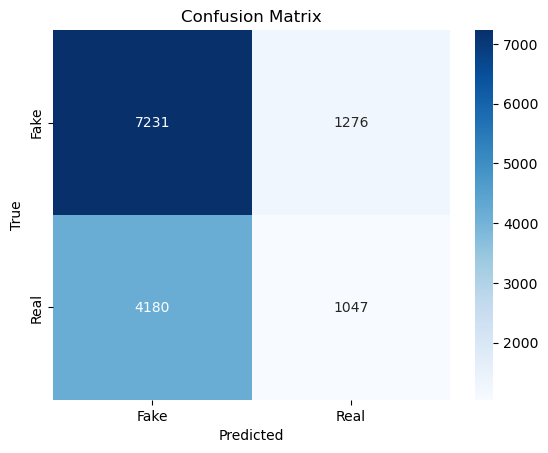

In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

all_errors = np.concatenate([real_errors, fake_errors])
all_labels = np.concatenate([np.ones_like(real_errors), np.zeros_like(fake_errors)])

# Set Threshold (e.g., 95th percentile of real errors)
threshold = np.percentile(fake_errors, 85)

# Classify Based on Threshold
predictions = (all_errors > threshold).astype(int)

# Calculate Metrics
accuracy = accuracy_score(all_labels, predictions)
precision = precision_score(all_labels, predictions)
recall = recall_score(all_labels, predictions)
f1 = f1_score(all_labels, predictions)
roc_auc = roc_auc_score(all_labels, all_errors)
conf_matrix = confusion_matrix(all_labels, predictions)

# Print Metrics
print(f"Threshold: {threshold}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()